In [1]:
import gensim

Word2VecModel = gensim.models.Word2Vec.load(r'\weibo_word2vec\200\weibo_59g_embedding_200.model') # 读取词向量

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

classify_data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
T_news = classify_data[classify_data['followers_count']>=1000][classify_data['label']=='LT']
T_news = T_news[['text', 'emo_prob_kw']]

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
import re
import jieba

def seg_sentence(s):
    sent = ''
    s = s.strip()  #去前后的空格
    s = re.sub(r"[0-9\s+\.\!\/_,$%^*()?;；:-【】+\"\']+|[+——！，;:。？、~@#￥%……&*（）]+", " ", s) #去标点符号
    words = jieba.cut(s)
    sent = ' '.join(words)
    return sent
T_news['seg'] = T_news['text'].apply(seg_sentence)
T_news.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ChuAI\AppData\Local\Temp\jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built successfully.


,text,emo_prob_kw,seg
0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,"[0.0, 0.0, 1.0, 0.0, 0.0]",中国 青年 女 科学家 奖 十周年 纪念大会 月 日 全国妇联 中国科协 ...
1,【民办教师首次纳入职评体系】北京市人力社保局、市教委召开深化中小学教师职称制度改革工作部署会...,-1,民办教师 首次 纳入 职评 体系 北京市 人力 社保局 市教委 召开 深化 中小...
2,#第8号台风#【粤海铁进出岛旅客列车逐步恢复运行】“电母”逐渐减弱，9:30琼州海峡恢复通航...,-1,第 号 台风 粤海铁 进出 岛 旅客列车 逐步 恢复 运行 电母 逐...
3,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,"[0.0, 0.0, 0.6666666666666666, 0.0, 0.33333333...",马鞍山 身边 事 市 拥军 代表团 赴 舟山 慰问 马鞍山 舰 全体官兵...
4,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,"[0.0, 0.5, 0.25, 0.0, 0.25]",回复 喝水 也 能活 百年 用来 吓唬人 也 是 不错 滴 美国 人 又 把 ...


In [4]:
def sen2vec(seg):
    words = seg.split(' ')
    sen2vec = np.zeros(200)
    i = 0
    for word in words:
        try:
            word2vec = Word2VecModel.wv[word]
            sen2vec += word2vec
            i += 1
        except:
            continue
    return sen2vec/i

T_news['sen2vec'] = T_news['seg'].apply(sen2vec)
T_news.head()

,text,emo_prob_kw,seg,sen2vec
0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,"[0.0, 0.0, 1.0, 0.0, 0.0]",中国 青年 女 科学家 奖 十周年 纪念大会 月 日 全国妇联 中国科协 ...,"[-0.46926108025945723, -0.39488003635779023, -..."
1,【民办教师首次纳入职评体系】北京市人力社保局、市教委召开深化中小学教师职称制度改革工作部署会...,-1,民办教师 首次 纳入 职评 体系 北京市 人力 社保局 市教委 召开 深化 中小...,"[-1.1353874817633858, -2.8555219246026797, 2.4..."
2,#第8号台风#【粤海铁进出岛旅客列车逐步恢复运行】“电母”逐渐减弱，9:30琼州海峡恢复通航...,-1,第 号 台风 粤海铁 进出 岛 旅客列车 逐步 恢复 运行 电母 逐...,"[-0.8650825799753269, -1.581405599291126, 2.41..."
3,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,"[0.0, 0.0, 0.6666666666666666, 0.0, 0.33333333...",马鞍山 身边 事 市 拥军 代表团 赴 舟山 慰问 马鞍山 舰 全体官兵...,"[-1.3286951894173398, -1.4941865827143193, 0.5..."
4,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,"[0.0, 0.5, 0.25, 0.0, 0.25]",回复 喝水 也 能活 百年 用来 吓唬人 也 是 不错 滴 美国 人 又 把 ...,"[-0.4453779576402722, -0.25825825593236723, -0..."


In [5]:
for j in range(200):
    T_news[str(j)] = T_news['sen2vec'].apply(lambda a: a[j])

In [6]:
T_news.shape

(6797, 204)

In [7]:
from sklearn.cluster import KMeans
T_news = T_news.dropna()
km_T = KMeans(n_clusters=5, n_jobs=4, random_state=2020)
km_T.fit(T_news.loc[:,'0':'199'])
# 簇中心
cluster_ceter_list = km_T.cluster_centers_
# 样本属于的簇序号列表
cluster_list = km_T.labels_.tolist()
T_news['label'] = km_T.labels_

In [8]:
T_news = T_news.reset_index(drop=True)
T_news['dis_center'] = 0
for index in range(T_news.shape[0]):
    cluster_num = cluster_list[index]
    df_T = T_news.loc[:, '0':'199']
    T_news.iloc[index,-1] = np.sum(np.power(df_T.iloc[index, :] - cluster_ceter_list[cluster_num], 2))
T_news.head()

,text,emo_prob_kw,seg,sen2vec,0,1,2,3,4,5,...,192,193,194,195,196,197,198,199,label,dis_center
0,中国青年女科学家奖十周年纪念大会:12月17日，全国妇联、中国科协、中国联合国教科文组织及@...,"[0.0, 0.0, 1.0, 0.0, 0.0]",中国 青年 女 科学家 奖 十周年 纪念大会 月 日 全国妇联 中国科协 ...,"[-0.46926108025945723, -0.39488003635779023, -...",-0.469261,-0.394880,-0.585550,-1.475477,1.007151,1.001829,...,-0.394303,0.411053,0.323670,-1.661370,0.959204,0.171013,0.886467,-0.994986,3,133.686922
1,【民办教师首次纳入职评体系】北京市人力社保局、市教委召开深化中小学教师职称制度改革工作部署会...,-1,民办教师 首次 纳入 职评 体系 北京市 人力 社保局 市教委 召开 深化 中小...,"[-1.1353874817633858, -2.8555219246026797, 2.4...",-1.135387,-2.855522,2.436434,-0.619415,0.224819,0.110786,...,-1.203812,-1.442468,-0.137438,-1.831763,1.905068,-0.180687,2.954157,-0.281484,0,126.591760
2,#第8号台风#【粤海铁进出岛旅客列车逐步恢复运行】“电母”逐渐减弱，9:30琼州海峡恢复通航...,-1,第 号 台风 粤海铁 进出 岛 旅客列车 逐步 恢复 运行 电母 逐...,"[-0.8650825799753269, -1.581405599291126, 2.41...",-0.865083,-1.581406,2.415784,-0.509915,0.556345,-0.707725,...,-1.700058,-1.464497,0.652276,0.496071,-1.426229,0.089534,0.970871,0.719858,4,128.594489
3,#马鞍山身边事# 【市拥军代表团赴舟山慰问“马鞍山舰”全体官兵】8月15—16日，在抗日战争...,"[0.0, 0.0, 0.6666666666666666, 0.0, 0.33333333...",马鞍山 身边 事 市 拥军 代表团 赴 舟山 慰问 马鞍山 舰 全体官兵...,"[-1.3286951894173398, -1.4941865827143193, 0.5...",-1.328695,-1.494187,0.593689,-1.503828,0.638641,-0.214053,...,-1.971308,-0.541990,0.303812,-0.785988,-0.144426,0.386441,1.326418,-0.214802,4,55.161004
4,回复@喝水也能活百年:用来吓唬人也是不错滴，美国人又把B1放到关岛去了[拜拜] //@喝水也...,"[0.0, 0.5, 0.25, 0.0, 0.25]",回复 喝水 也 能活 百年 用来 吓唬人 也 是 不错 滴 美国 人 又 把 ...,"[-0.4453779576402722, -0.25825825593236723, -0...",-0.445378,-0.258258,-0.426241,0.108222,0.758613,0.423980,...,0.141516,-0.728641,0.673966,0.380734,1.202363,-0.119897,-0.031803,0.083750,2,74.894707


In [10]:
hlt_text = ['#西部资源重组媒体说明会# 【阙文彬回答媒体提问：继续加大稀贵金属投资】针对媒体关于公司主业方面的提问，西部资源实际控制人阙文彬说，从新能源到文化转到稀贵金属，我个人认为新的董事会或者新的经营班子接上后，应该在2亿-5亿的利润差不多，在这个基础上将现有的一些企业通过一种合法的途径出售，...全文： http://m.weibo.cn/1315587597/4010238174942685',
            '#聚焦赣州#【[心]爸妈在哪里？崇义文昌塔旁发现的小男孩至今还在福利院】8月17日，一则“崇义县横水派出所民警在文昌塔附近一脐橙园树下，发现一名哭泣的小男孩至今无人认领”的消息，在微信朋友圈广泛转发，文章中还附有几张小男孩的照片。当日下午，记者了解到，目前小男孩经医院检查无碍后已被送往...全文： http://m.weibo.cn/1970239225/4009774025014136',
            '#鹤壁身边事# 【淇滨区兰苑社区刘振强：带爸妈旅行，收获满满的幸福】“我父亲一直想出门走走，特别想去北京看一看。我以前没有在意，感觉父母还年轻，以后有的是机会。直到父亲生了一场大病，需要借助轮椅出行，我才感到了后悔，幸好还来得及补救。”8月16日，淇滨区兰苑社区的刘振强告诉记者，最近他...全文： http://m.weibo.cn/2514256341/4009491428875467',
            '#里约奥运会# 【“不懂球的胖纸”辛苦啦[威武]】那位中国乒乓天团背后的胖子[偷笑]，对！刘国梁，绝对是个全能多面手。魔鬼训练队员，提供呐喊、助威、唤醒服务，送水送毛巾，么么哒队员[亲亲]，还得亲自煮面犒赏三军......于是中国连续三届奥运拿下乒乓全部金牌[奥运金牌]。有网友说：“又当爹又当妈...全文： http://m.weibo.cn/1891503444/4009944795388322',
           '7月12日本报二版为您呈现：中国文物保护基金会召开专项基金工作座谈会、安徽铜陵全力抢险凤凰山铜矿金牛洞古采矿遗址、国博举办《四部医典》曼唐长卷——娘本唐卡艺术传承成果展、湖北实施“三级联审”模式，加快推进文物普查数据审核、新疆举办第一次全国可移动文物普查培训班、《南海诸岛地理志略》...全文： http://m.weibo.cn/1250227403/3997198805156773']
def target(text):
    target = 0
    if text in hlt_text:
        target = 1
    else:
        pass
    return target
T_news['target'] = T_news['text'].apply(target)

In [21]:
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from mpl_toolkits.mplot3d import axes3d 
import seaborn as sns
from matplotlib import style

RS = 2020
X = T_news.loc[:,'0':'199'].values
y = T_news['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

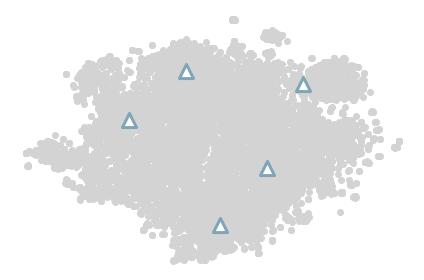

In [23]:
fig, ax = plt.subplots()
ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==1],X2D.iloc[:,1][X2D['target']==1], marker='^', s=200, 
           facecolors='white',
           linewidth=3,
           color='#7FA5B7')
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('images/HLT_text.pdf')
plt.show()

In [14]:
key_words = ['全文', '活动', '发布', '记者', '奥运', '早安', '近日', '发展', '获得', '工作', '进行', '头条', '市民', '奥运会', '小编', 
 '经济', '举行', '本报', '选手', '天气', '正式', '汽车', '企业', '报名', '成为', '决赛', '日前', '嘻嘻', '科技', '平台', '建设', 
 '私信', '显示', '晚安', '小伙伴', '体验', '故事', '生活', '世界', '我市', '公司', '市场', '学习', '历史', '计划', '身体',
 '问题', '部分', '偷笑', '艺术', '如何', '城市', '机会', '开展', '国际', '创新', '不少', '相关', '继续', '习近平', '电影', 
 '支持', '加油', '获悉', '时代', '博文', '举办', '文化', '昨日', '价格', '江门', '发布会', '最好', '比赛', '周刊', '推荐', 
 '产业', '以来', '全球', '社区', '母亲', '英国', '日报', '回复', '喜欢', '时间', '快乐', '王宝强', '视频', '坚持', '作品',
 '司机', '同时', '海南', '一年', '民警', '值得', '一场', '妻子', '中国女排', '甚至', '最高', '品牌', '详见', '周末', '目前', 
 '期待', '摄影', '中心', '上海', '亿元', '首次', '不同', '互联网', '宁德', '投票', '投资', '邀请', '产品', '价值', '给力', 
 '梦想', '年度', '未来', '精彩', '对于', '有限公司', '今年', '高温', '进一步', '一天', '链接', '服务', '即将', '门票', '发现', 
 '环境', '上午', '公布', '周报', '每日', '提醒', '情况', '忘记', '健康', '金牌', '运河', '大会', '经历', '道路']
hlt_text = ['#西部资源重组媒体说明会# 【阙文彬回答媒体提问：继续加大稀贵金属投资】针对媒体关于公司主业方面的提问，西部资源实际控制人阙文彬说，从新能源到文化转到稀贵金属，我个人认为新的董事会或者新的经营班子接上后，应该在2亿-5亿的利润差不多，在这个基础上将现有的一些企业通过一种合法的途径出售，...全文： http://m.weibo.cn/1315587597/4010238174942685',
            '#聚焦赣州#【[心]爸妈在哪里？崇义文昌塔旁发现的小男孩至今还在福利院】8月17日，一则“崇义县横水派出所民警在文昌塔附近一脐橙园树下，发现一名哭泣的小男孩至今无人认领”的消息，在微信朋友圈广泛转发，文章中还附有几张小男孩的照片。当日下午，记者了解到，目前小男孩经医院检查无碍后已被送往...全文： http://m.weibo.cn/1970239225/4009774025014136',
            '#鹤壁身边事# 【淇滨区兰苑社区刘振强：带爸妈旅行，收获满满的幸福】“我父亲一直想出门走走，特别想去北京看一看。我以前没有在意，感觉父母还年轻，以后有的是机会。直到父亲生了一场大病，需要借助轮椅出行，我才感到了后悔，幸好还来得及补救。”8月16日，淇滨区兰苑社区的刘振强告诉记者，最近他...全文： http://m.weibo.cn/2514256341/4009491428875467',
            '#里约奥运会# 【“不懂球的胖纸”辛苦啦[威武]】那位中国乒乓天团背后的胖子[偷笑]，对！刘国梁，绝对是个全能多面手。魔鬼训练队员，提供呐喊、助威、唤醒服务，送水送毛巾，么么哒队员[亲亲]，还得亲自煮面犒赏三军......于是中国连续三届奥运拿下乒乓全部金牌[奥运金牌]。有网友说：“又当爹又当妈...全文： http://m.weibo.cn/1891503444/4009944795388322',
           '7月12日本报二版为您呈现：中国文物保护基金会召开专项基金工作座谈会、安徽铜陵全力抢险凤凰山铜矿金牛洞古采矿遗址、国博举办《四部医典》曼唐长卷——娘本唐卡艺术传承成果展、湖北实施“三级联审”模式，加快推进文物普查数据审核、新疆举办第一次全国可移动文物普查培训班、《南海诸岛地理志略》...全文： http://m.weibo.cn/1250227403/3997198805156773']

In [15]:
import jieba 
def cut_text(text):
    for word in jieba.cut(text):
        if word in key_words:
            print(word)
        else:
            pass

In [18]:
cut_text(hlt_text[0])

继续
投资
公司
文化
企业
全文


In [19]:
cut_text(hlt_text[1])

发现
民警
发现
记者
目前
全文


In [20]:
cut_text(hlt_text[2])

社区
机会
一场
社区
记者
全文


In [21]:
cut_text(hlt_text[3])

奥运会
偷笑
服务
奥运
金牌
全文


In [22]:
cut_text(hlt_text[4])

本报
工作
举办
艺术
举办
全文


In [16]:
from collections import Counter
key_words_HLT = []
with open('data/key_words_HLT.txt', 'r', encoding='utf-8-sig') as f:
    for word in f:
        word = word.strip()
        tup = (word, 'HLT')
        key_words_HLT.append(tup)
key_words_HLT = pd.DataFrame(key_words_HLT)
key_words_HLT.columns = ['word', 'label']

In [17]:
def word2vec(word):
    word2vec = '-1'
    try:
        word2vec = Word2VecModel.wv[word]
    except:
        pass
    return word2vec
key_words_HLT['word2vec'] = key_words_HLT['word'].apply(word2vec)

In [18]:
key_words_HLT = key_words_HLT[key_words_HLT['word2vec']!='-1']

HLT_words = ['继续', '投资', '公司', '文化', '企业', '全文', '发现', '民警', '发现', '记者', '目前', '全文', '社区', 
             '机会', '一场', '社区', '记者', '全文', '奥运会', '服务', '奥运', '金牌', '全文', '本报', '工作', '呈现', '举办',
             '艺术', '举办', '全文', '哭泣', '转发', '收获', '幸福', '后悔', '幸好', '补救', '魔鬼', '助威', '么么哒', '犒赏']
HLT_words = list(set(HLT_words))

def target(word):
    target = 0
    if word in HLT_words:
        target = 1
    else:
        pass
    return target
key_words_HLT['target'] = key_words_HLT['word'].apply(target)

for j in range(200):
    key_words_HLT[str(j)] = key_words_HLT['word2vec'].apply(lambda a: a[j])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\ops.py:1122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)


In [19]:
RS = 2020
X = key_words_HLT.loc[:,'0':'199'].values
y = key_words_HLT['target'].values
X2D = TSNE(random_state=RS).fit_transform(X)
X2D = pd.DataFrame(X2D)
X2D['target'] = y

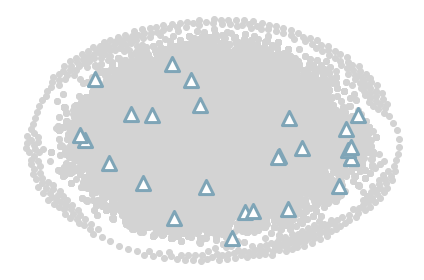

In [20]:
fig, ax = plt.subplots()

ax.scatter(X2D.iloc[:,0][X2D['target']==0],X2D.iloc[:,1][X2D['target']==0], color='lightgrey')
ax.scatter(X2D.iloc[:,0][X2D['target']==1],X2D.iloc[:,1][X2D['target']==1], marker='^', s=200, color='#7FA5B7',
          facecolors='white',
          linewidth=3
          )
ax.set_yticks([])
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.savefig('images/HLT_words.pdf')
plt.show()